## ICE-7. MPEG-7 Color Layout Descriptor
Please download the images from the following link:<br>
https://drive.google.com/file/d/1h0JFzpyc7zNZiln5Ls74CfvOfhtl51XK/view?usp=sharing <br><br>
Please refer to the following link for the code of Color Layout Descriptor: <br>
https://github.com/scferrada/imgpedia

In [132]:
!apt install subversion
!svn checkout https://github.com/NarendarNelakurthi/FeatureEngineering

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 subversion
0 upgraded, 5 newly installed, 0 to remove and 22 not upgraded.
Need to get 2,235 kB of archives.
After this operation, 9,916 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libapr1 amd64 1.6.3-2 [90.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaprutil1 amd64 1.6.1-2 [84.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libserf-1-1 amd64 1.3.9-6 [44.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/unive

## Task 1. Please using the given code to extract the color layout features from the downloaded image 001.jpg, and display it.

In [133]:
from abc import ABCMeta, abstractmethod

class DescriptorComputer:
	__metaclass__ = ABCMeta
	
	@abstractmethod
	def compute(self, frame):
		 pass

In [134]:
import cv2, sys, os
import numpy as np
#from DescriptorComputer import DescriptorComputer


class ColorLayoutComputer(DescriptorComputer):

    def __init__(self):
        self.rows = 8
        self.cols = 8
        self.prefix = "CLD"

    def compute(self, img):
        averages = np.zeros((self.rows,self.cols,3))
        imgH, imgW, _ = img.shape
        for row in range(self.rows):
            for col in range(self.cols):
                slice = img[int(int(imgH)/self.rows * row): int(int(imgH)/self.rows * (row+1)), int(int(imgW)/self.cols*col) : int(int(imgW)/self.cols*(col+1))]
                average_color_per_row = np.mean(slice, axis=0)
                average_color = np.mean(average_color_per_row, axis=0)
                average_color = np.uint8(average_color)
                averages[row][col][0] = average_color[0]
                averages[row][col][1] = average_color[1]
                averages[row][col][2] = average_color[2]
        icon = cv2.cvtColor(np.array(averages, dtype=np.uint8), cv2.COLOR_BGR2YCR_CB)
        y, cr, cb = cv2.split(icon)
        dct_y = cv2.dct(np.float32(y))
        dct_cb = cv2.dct(np.float32(cb))
        dct_cr = cv2.dct(np.float32(cr))
        dct_y_zigzag = []
        dct_cb_zigzag = []
        dct_cr_zigzag = []
        flip = True
        flipped_dct_y = np.fliplr(dct_y)
        flipped_dct_cb = np.fliplr(dct_cb)
        flipped_dct_cr = np.fliplr(dct_cr)
        for i in range(self.rows + self.cols -1):
            k_diag = self.rows - 1 - i
            diag_y = np.diag(flipped_dct_y, k=k_diag)
            diag_cb = np.diag(flipped_dct_cb, k=k_diag)
            diag_cr = np.diag(flipped_dct_cr, k=k_diag)
            if flip:
                diag_y = diag_y[::-1]
                diag_cb = diag_cb[::-1]
                diag_cr = diag_cr[::-1]
            dct_y_zigzag.append(diag_y)
            dct_cb_zigzag.append(diag_cb)
            dct_cr_zigzag.append(diag_cr)
            flip = not flip
        return np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])

In [135]:
color_layout = ColorLayoutComputer()
pic = cv2.imread("/content/FeatureEngineering/trunk/ICE-7_data/ICE-7_data/001.jpg")
desc = color_layout.compute(pic)

In [136]:
desc

array([ 7.54875000e+02, -3.71453323e+01, -2.75390893e-01, -2.05506821e+02,
        7.78468102e-02, -2.34176540e+01, -3.93178177e+01,  3.43435440e+01,
        2.75409832e+01, -5.34272051e+00, -4.38750000e+01,  5.65796041e+00,
        2.59727240e+00, -2.54444008e+01, -1.43750000e+01, -2.34878922e+01,
        2.55022869e+01,  2.20043163e+01, -3.80048065e+01, -5.47946072e+00,
        6.65629059e-02,  5.35990372e+01, -1.31532040e+01,  2.22179368e-01,
        4.08514328e+01, -2.71923709e+00, -2.33335533e+01, -7.21246767e+00,
       -2.86610723e+00,  1.22206163e+01,  3.80418777e+00, -3.12251759e+01,
        3.03049412e+01,  1.38942504e+00,  7.60543251e+00,  1.85286961e+01,
        1.82548904e+01, -2.60280678e-03, -1.26275692e+01,  2.58750000e+01,
        2.63148155e+01, -3.00260210e+00, -2.30272079e+00, -2.49541059e-01,
       -1.75480080e+01,  2.62883568e+01,  8.04879284e+00, -2.93222847e+01,
        1.81053467e+01, -1.63744450e+01, -1.93038082e+01,  1.69019365e+00,
        8.70240688e+00,  

## Task 2. Retrieve the image that is the most similar to image 001.jpg from the downloaded images (not itself).
Please try to use at least three different metrics to measure the distance between color layout descriptors (L1 distance, L2 distance, earth mover's distance, etc)

In [137]:
# write you code here


## Question 1. Please answer if the outputs of Task 2 are the same. If the outputs are different, based on your perspective, which metrics gives the most similar retrieval? If the outputs are the same, do you think we can use any metrics to compare the color layout features in any cases? Give an explanation to your answer.

**Answer to Q1**: type your answer here


---

## Image Filtering



## (Tutorial) Convolutional filter
Please review the following article for further understanding of Convolutional layer in Convolutional Neural Network
https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/ <br>
Please download the image from the following link for the your program <br>
https://drive.google.com/file/d/1MSQ8e0nxoBIkcp5sdo8Vd-65b9okx6hX/view?usp=sharing

* use pip install opencv-python to install cv2

## Example. Convolutional filter

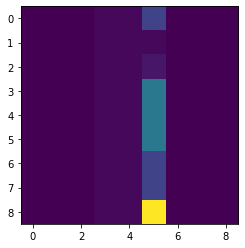

[[  0   0   0   5   0  77   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0 134   0   0   0]
 [  0   0   0   3   0 117   0   0   0]
 [  0   0   0   3   0 127   0   0   0]
 [  0   0   0   3   0  47   0   0   0]
 [  0   0   0   3   0  17   0   0   0]
 [  0   0   0   5   0 255   0   0   0]]


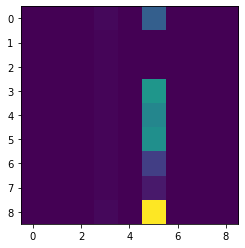

In [138]:
import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np

# build the test data
data = np.array([[0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 50, 0, 0, 0]], dtype='uint8')   
plt.imshow(data)
pylab.show()

#build the convolutional kernel
fil_k = np.array([[ -1, -1, -1],                        
                [ -1, 8, -1],
                [ -1, -1, -1]])
#use filter2D to apply convolution
res = cv2.filter2D(data,-1,fil_k, borderType=cv2.BORDER_CONSTANT)   
print(res)

plt.imshow(res)
pylab.show()

## Task 3. Building three different kernels for different purposes, and commenting the purpose of each kernel
For instance, the kernel in the example is using for edge extraction

In [139]:
# write your code here

In [140]:
#Gaussian Blur

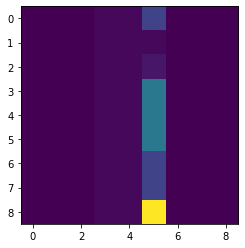

[[ 0  0  0  1  2  3  1  0  0]
 [ 0  0  0  1  2  2  1  0  0]
 [ 0  0  0  1  2  4  2  0  0]
 [ 0  0  0  1  5  8  4  0  0]
 [ 0  0  0  1  6 10  5  0  0]
 [ 0  0  0  1  5  9  4  0  0]
 [ 0  0  0  1  4  6  3  0  0]
 [ 0  0  0  1  6 10  5  0  0]
 [ 0  0  0  1  7 14  7  0  0]]


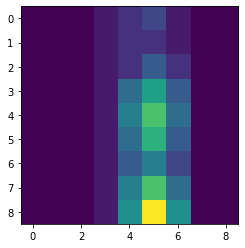

In [141]:
import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np

# build the test data
data = np.array([[0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 50, 0, 0, 0]], dtype='uint8')   
plt.imshow(data)
pylab.show()

#build the convolutional kernel
gaussian_k = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
#use filter2D to apply convolution
res = cv2.filter2D(data,-1,gaussian_k, borderType=cv2.BORDER_CONSTANT)   
print(res)

plt.imshow(res)
pylab.show()

In [142]:
#Sharpen Kernel

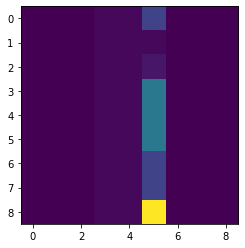

[[  0   0   0   3   0  48   0   0   0]
 [  0   0   0   2   1   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   0   0   2   0  76   0   0   0]
 [  0   0   0   2   0  59   0   0   0]
 [  0   0   0   2   0  69   0   0   0]
 [  0   0   0   2   0  19   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   0   0   3   0 239   0   0   0]]


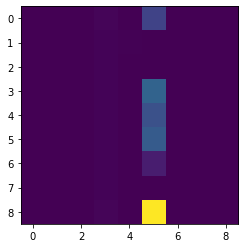

In [143]:
import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np

# build the test data
data = np.array([[0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 50, 0, 0, 0]], dtype='uint8')   
plt.imshow(data)
pylab.show()

#build the convolutional kernel
sharpen_k = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
#use filter2D to apply convolution
res = cv2.filter2D(data,-1,sharpen_k, borderType=cv2.BORDER_CONSTANT)   
print(res)

plt.imshow(res)
pylab.show()

## Task 4. Refer to the multiple channels section in the tutorial material, apply the three kernels you built in task 1 to the downloaded image. Visualize the feature maps produced by the three kernels. Combine the three feature maps to a 3-channels feature map and visualize it.

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [145]:
# write your code here

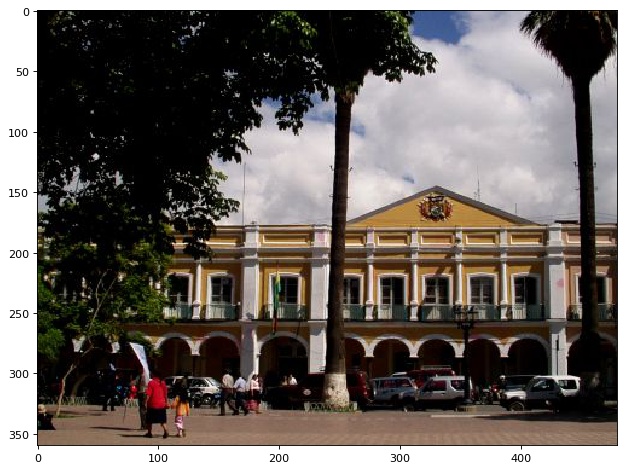

In [146]:
image = imread('/content/1.jpg')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(image);

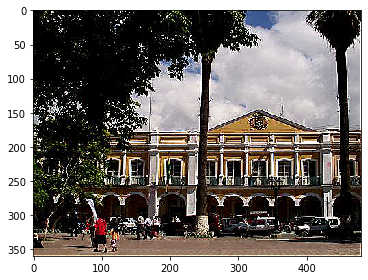

In [147]:
#build the convolutional kernel
sharpen_k = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
#use filter2D to apply convolution
res = cv2.filter2D(image,-1,sharpen_k, borderType=cv2.BORDER_CONSTANT)   


imshow(res)
pylab.show()

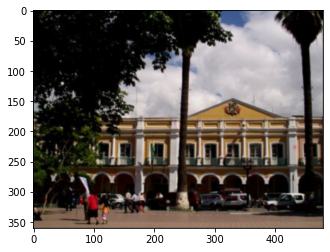

In [148]:
#build the convolutional kernel
gaussian_k = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
#use filter2D to apply convolution
res = cv2.filter2D(image,-1,gaussian_k, borderType=cv2.BORDER_CONSTANT)   


plt.imshow(res)
pylab.show()

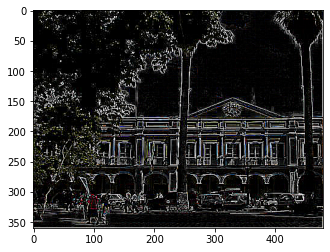

In [149]:
#build the convolutional kernel
fil_k = np.array([[ -1, -1, -1],                        
                [ -1, 8, -1],
                [ -1, -1, -1]])
#use filter2D to apply convolution
res = cv2.filter2D(image,-1,fil_k, borderType=cv2.BORDER_CONSTANT)   


plt.imshow(res)
pylab.show()

In [150]:
gaussian = cv2.filter2D(image,-1,gaussian_k, borderType=cv2.BORDER_CONSTANT)  
sharpen= cv2.filter2D(image,-1,sharpen_k, borderType=cv2.BORDER_CONSTANT)  
edge= cv2.filter2D(image,-1,fil_k, borderType=cv2.BORDER_CONSTANT)  

In [151]:
import cv2

In [152]:
final_image=cv2.add(gaussian,sharpen,edge)

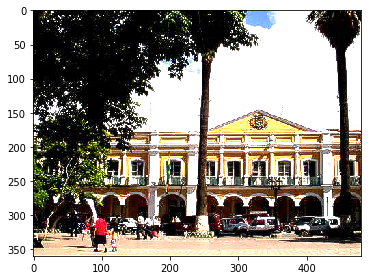

In [153]:
imshow(final_image)

## Task 5. Refer to the multiple layers section in the tutorial material, repeatly apply the three kernels to the combined feature map that created by the previous round two times. Visualize the feature maps produced in the process

In [154]:
# write your code here

In [155]:
final_image

array([[[  0,   4,   0],
        [  0,   3,   0],
        [  0,   4,   0],
        ...,
        [ 45,  50,  36],
        [ 16,  18,  15],
        [228, 244, 251]],

       [[  0,   3,   0],
        [  0,   3,   0],
        [  0,   0,   0],
        ...,
        [ 35,  39,  29],
        [ 15,  18,  15],
        [109, 121, 127]],

       [[  0,   3,   0],
        [  0,   4,   0],
        [  0,   0,   0],
        ...,
        [ 27,  33,  18],
        [  8,  10,   8],
        [ 23,  36,  38]],

       ...,

       [[255, 255, 239],
        [255, 215, 173],
        [255, 220, 178],
        ...,
        [255, 241, 201],
        [255, 247, 207],
        [255, 255, 255]],

       [[255, 255, 246],
        [255, 222, 180],
        [255, 220, 178],
        ...,
        [233, 183, 143],
        [231, 181, 141],
        [255, 248, 193]],

       [[255, 255, 255],
        [255, 255, 245],
        [255, 255, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [156]:
k=2

In [157]:
gaussian_k,sharpen_k,fil_k

(array([[0.0625, 0.125 , 0.0625],
        [0.125 , 0.25  , 0.125 ],
        [0.0625, 0.125 , 0.0625]]), array([[ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0]]), array([[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]]))

In [158]:
cv2.filter2D(final_image,-1,gaussian_k, borderType=cv2.BORDER_CONSTANT)  

array([[[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [ 28,  29,  16],
        [ 49,  54,  51],
        [ 74,  80,  81]],

       [[  0,   2,   0],
        [  0,   3,   0],
        [  0,   1,   0],
        ...,
        [ 33,  34,  19],
        [ 45,  51,  48],
        [ 62,  69,  71]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   1,   0],
        ...,
        [ 23,  23,  12],
        [ 21,  25,  22],
        [ 22,  28,  30]],

       ...,

       [[191, 181, 163],
        [255, 226, 190],
        [255, 217, 175],
        ...,
        [250, 225, 185],
        [251, 232, 199],
        [190, 183, 166]],

       [[191, 185, 172],
        [255, 235, 208],
        [255, 229, 195],
        ...,
        [245, 217, 187],
        [246, 225, 195],
        [188, 180, 158]],

       [[143, 141, 136],
        [191, 185, 173],
        [191, 183, 167],
        ...,
        [186, 174, 164],
        [187, 177, 166],
        [142, 138, 129]]

In [159]:
k=2

In [160]:
gaussian_k

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [162]:
gaussian_1 = cv2.filter2D(final_image,-1,gaussian_k, borderType=cv2.BORDER_CONSTANT)  
sharpen_1= cv2.filter2D(final_image,-1,sharpen_k, borderType=cv2.BORDER_CONSTANT)  
edge_1= cv2.filter2D(final_image,-1,fil_k, borderType=cv2.BORDER_CONSTANT)  

In [163]:
final_image_1=cv2.add(gaussian_1,sharpen_1,edge_1)

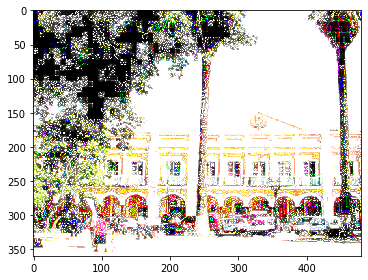

In [164]:
imshow(final_image_1)

In [165]:
gaussian_2 = cv2.filter2D(final_image,-1,gaussian_k, borderType=cv2.BORDER_CONSTANT)  
sharpen_2= cv2.filter2D(final_image,-1,sharpen_k, borderType=cv2.BORDER_CONSTANT)  
edge_2= cv2.filter2D(final_image,-1,fil_k, borderType=cv2.BORDER_CONSTANT)

In [166]:
final_image_2=cv2.add(gaussian_2,sharpen_2,edge_2)

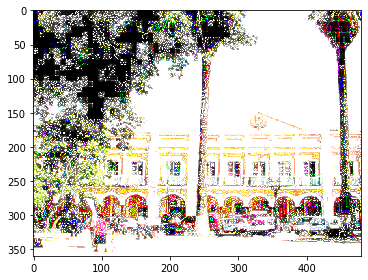

In [167]:
imshow(final_image_2)